**Proyecto Equipo D**

![An image](https://media.timtul.com/media/users/hackaboss_300_20211202185733.png)

**Proyecto II Grupo D** del curso de Ciencia de Datos de Hack'a'Boss **01 Julio 2024** (DSB10RT).

Seleccionar uno de estos enfoques para el proyecto y definir el problema

Para este segundo proyecto vamos a poder elegir entre:

**Machine Learning**
*   Aprendizaje supervisado.
*   Aprendizaje no supervisado.

**NLP**
*   Análisis de Texto.
*   Modelos predictivos.
*   Análisis de Sentimiento.

**Algoritmos Genéticos**

**Recomendadores.**


# 01. Definición del problema

Partimos por la definición del problema o el objetivo del proyecto.
- El objetivo es predecir si una persona tiene enfermedad cardíaca (HeartDisease) en base a las características proporcionadas en el dataset.

¿Qué variable queremos predecir?
- HeartDisease (clasificación binaria: 'Yes' o 'No')

¿Es una regresión o una clasificación?
- Clasificación

¿Qué datos son necesarios para predecir esa variable?
- Las características proporcionadas en el dataset, que incluyen factores de salud y hábitos de vida de los individuos.

¿Cómo consigo esos datos?
- Los datos ya están disponibles en el archivo 'heart_2020_cleaned.csv'.

# 02. Recopilación de Datos

Una de las etapas más difíciles de todo proyecto, para esta etapa podemos decidir usar herramientas del los módulos pasados, como API o Web Scraping.

Podemos usar las siguientes fuentes para encontrar los datos que necesitamos.

Fuentes:

*  UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php

*  Kaggle: https://www.kaggle.com/datasets

*  Google Dataset Search: https://datasetsearch.research.google.com/

*  Microsoft Open Data: https://msropendata.com/

*  European Data: https://data.europa.eu/en

*  Awesome Data: https://github.com/awesomedata/awesome-public-datasets

*  Amazon Web Services: https://registry.opendata.aws/

##################

####################

El data set seleccionado fue descargado del siguiente enlace:

https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/Behavioral-Risk-Factor-Surveillance-System-BRFSS-N/ikwk-8git/data

# 03. Exploratory Data Analysis (EDA) y Procesamiento de Datos

Para seguir con el proyecto es necesario conocer los datos, para esto vamos a utilizar las herramientas de EDA, es decir, visualizaciones y estadística.

También es necesario procesar los datos antes de implementarlos en el modelo, esto comprende:

*   NaN's.

*   Outliers.

*   Variables no numéricas.

*   Dimensionalidad.

*   Normalización de Datos.

Esta parte del proyecto se debe adaptar a los datos.



## Importar Librerias Requeridas

In [5]:
!pip install scikit-learn
!pip install category_encoders
!pip install unidecode
!pip install --upgrade seaborn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from math import sqrt
from unidecode import unidecode

# Modelo
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Herramienta Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV

# Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Validaciones
from sklearn.model_selection import KFold, LeaveOneOut

# Importar herramientas de prepocesamiento necesarias
...

Ellipsis

## Exploración y limpieza Inicial del DataFrame

In [7]:
df = pd.read_csv("Data/heart_2020_cleaned.csv")

In [8]:
## Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

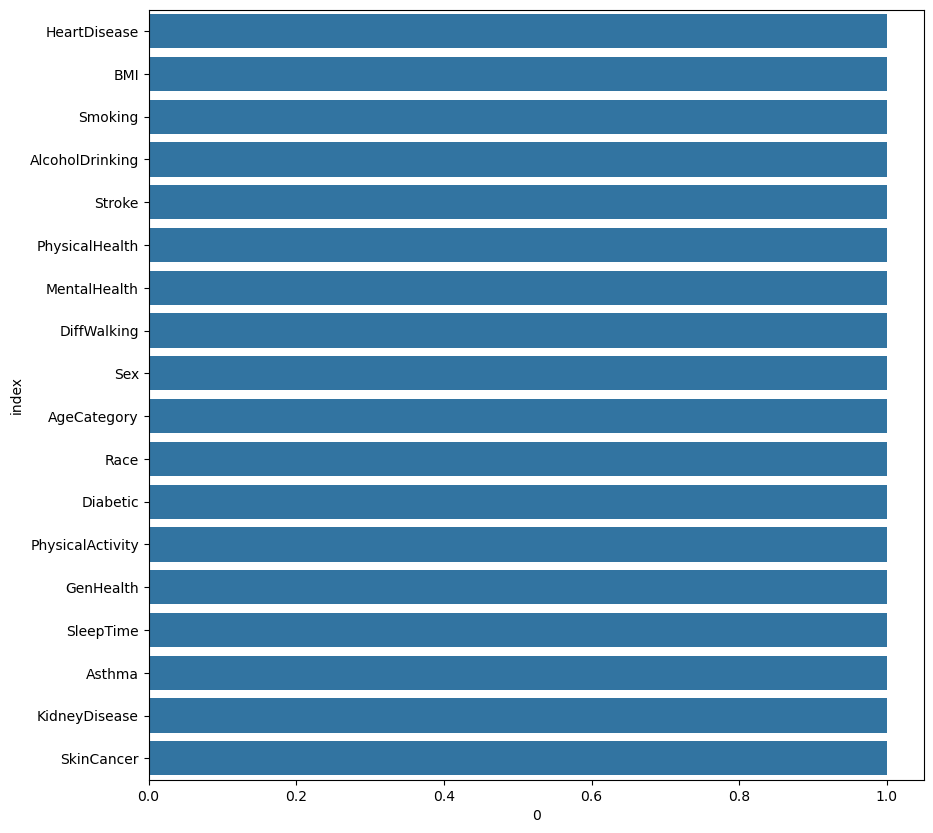

In [10]:
plt.figure(figsize=(10,10))
sns.barplot((pd.DataFrame(df.count())/df.shape[0]).reset_index(), x=0, y='index')
plt.show()

In [11]:
stats = df.describe()

stats

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [12]:
# Funcion para limpiar nombres de columnas de espacios y caracteres especiales

def limpiar_nomb_colums(nombre_columna):
    nombre_columna = nombre_columna.strip()
    nombre_columna = nombre_columna.replace(' ', '_')
    nombre_columna = unidecode(nombre_columna)
    return nombre_columna


In [13]:
# Funcion para limpiar los espacios en blanco al inicio y al final

def limpiar_espacios_blancos(df):
  for columna in df.columns:
    df[columna] = df[columna].str.strip()

In [14]:
# Funcion para cambiar valores None por NaN

def llenar_Nan(df):
  for columna in df.columns:
    df[columna] = df[columna].fillna(np.NaN)

In [15]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [16]:
## llenar_Nan(df)
## df.columns = df.columns.map(limpiar_nomb_colums)
## limpiar_espacios_blancos(df)

In [17]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Columna: HeartDisease

In [18]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['HeartDisease'].nunique()

2

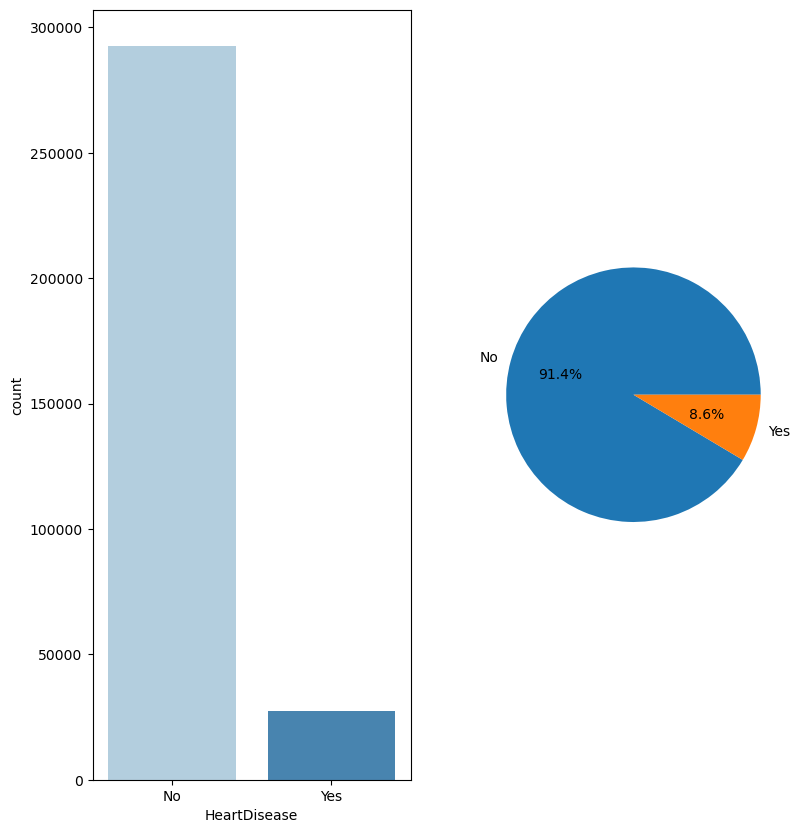

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))

sns.countplot(x='HeartDisease', palette='Blues', hue='HeartDisease', data=df, ax=axes[0])
plt.pie(df['HeartDisease'].value_counts(), autopct='%1.1f%%', labels=df['HeartDisease'].unique())
plt.subplots_adjust(left=0.2)
plt.show()

## Columna: BMI

In [21]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [22]:
df['BMI'].nunique()

3604

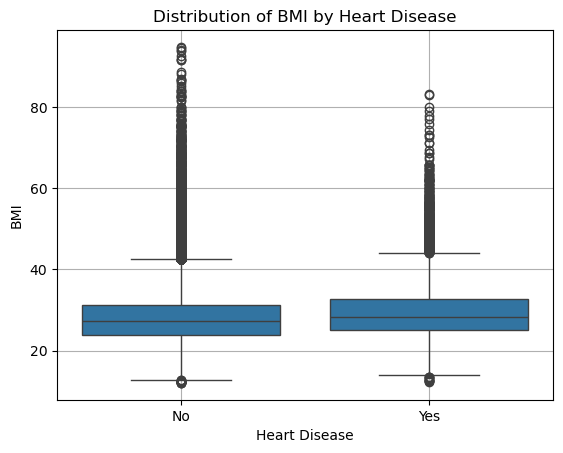

In [23]:
sns.boxplot(data = df, x = "HeartDisease", y = "BMI")
plt.xlabel("Heart Disease")
plt.ylabel("BMI")
plt.title("Distribution of BMI by Heart Disease")
plt.grid(True)
plt.show()

# Aplicar logaritmo

## Columna: Smoking

In [24]:
df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['Smoking'].nunique()

2

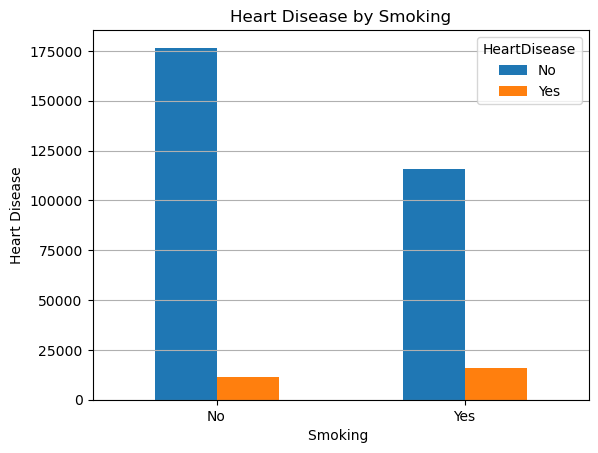

In [26]:
SMxHD = df.groupby(["Smoking", "HeartDisease"])["HeartDisease"].count().unstack()
SMxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Smoking ")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Smoking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: AlcoholDrinking

In [27]:
df['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df['AlcoholDrinking'].nunique()

2

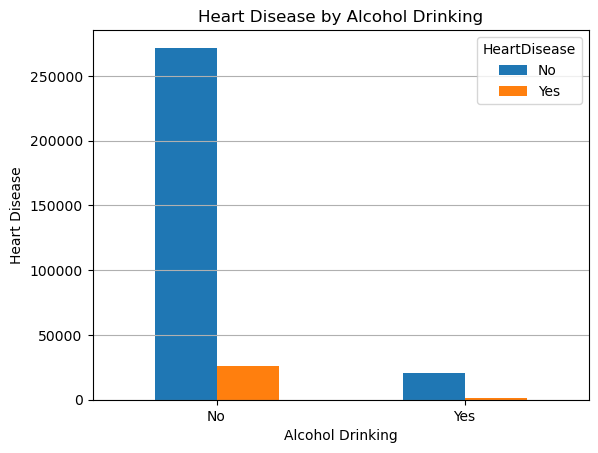

In [29]:
ADxHD = df.groupby(["AlcoholDrinking", "HeartDisease"])["HeartDisease"].count().unstack()
ADxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Alcohol Drinking")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Alcohol Drinking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: Stroke

In [30]:
df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['Stroke'].nunique()

2

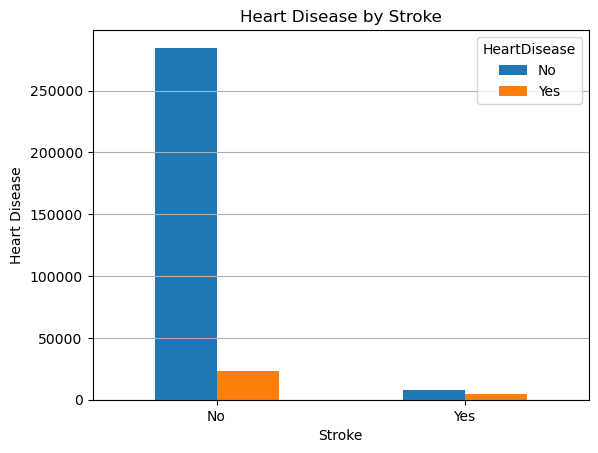

In [32]:
STxHD = df.groupby(["Stroke", "HeartDisease"])["HeartDisease"].count().unstack()
STxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Stroke")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Stroke")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: PhysicalHealth

In [33]:
# Rosalia

## Columna: MentalHealth

In [34]:
# Rosalia

## Columna: DiffWalking

In [35]:
# Rosalia

## Columna: Sex

In [36]:
# Rosalia

## Columna: AgeCategory

In [37]:
# 2024-07-02 AGM
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [38]:
df['AgeCategory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: AgeCategory
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [39]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['AgeCategory']])
df_age_category = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['AgeCategory']))
df_age_category.sample(5)

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
297671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
211677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_age_category = df_age_category.astype(int)
df_age_category.dtypes

AgeCategory_18-24          int64
AgeCategory_25-29          int64
AgeCategory_30-34          int64
AgeCategory_35-39          int64
AgeCategory_40-44          int64
AgeCategory_45-49          int64
AgeCategory_50-54          int64
AgeCategory_55-59          int64
AgeCategory_60-64          int64
AgeCategory_65-69          int64
AgeCategory_70-74          int64
AgeCategory_75-79          int64
AgeCategory_80 or older    int64
dtype: object

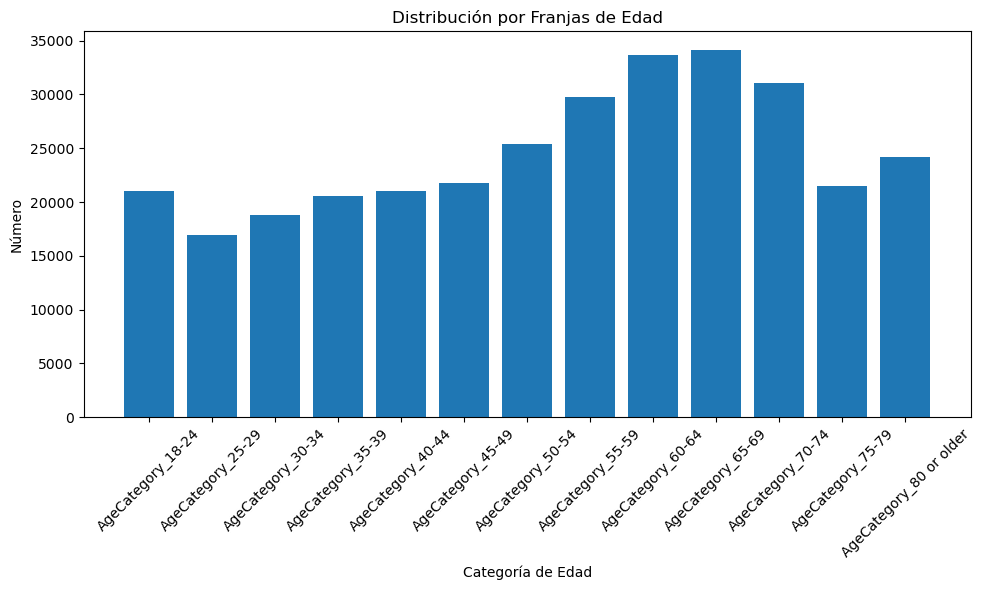

In [41]:
suma_edades = df_age_category.sum(axis = 0)

plt.figure(figsize=(10, 6))
plt.bar(suma_edades.index, suma_edades.values)
plt.title('Distribución por Franjas de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Columna: Race

In [42]:
# 2024-07-02 AGM

df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [43]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['Race']])
df_race = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['Race']))
df_race.sample(5)

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
294265,0.0,0.0,0.0,0.0,0.0,1.0
191622,0.0,0.0,0.0,1.0,0.0,0.0
181406,0.0,0.0,0.0,1.0,0.0,0.0
236080,0.0,0.0,0.0,0.0,0.0,1.0
245713,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
df_race = df_race.astype(int)
df_race.sample(5)

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
221589,0,0,0,0,0,1
35269,0,0,0,0,1,0
29683,0,0,0,0,0,1
83266,0,0,0,0,0,1
290213,0,0,0,0,0,1


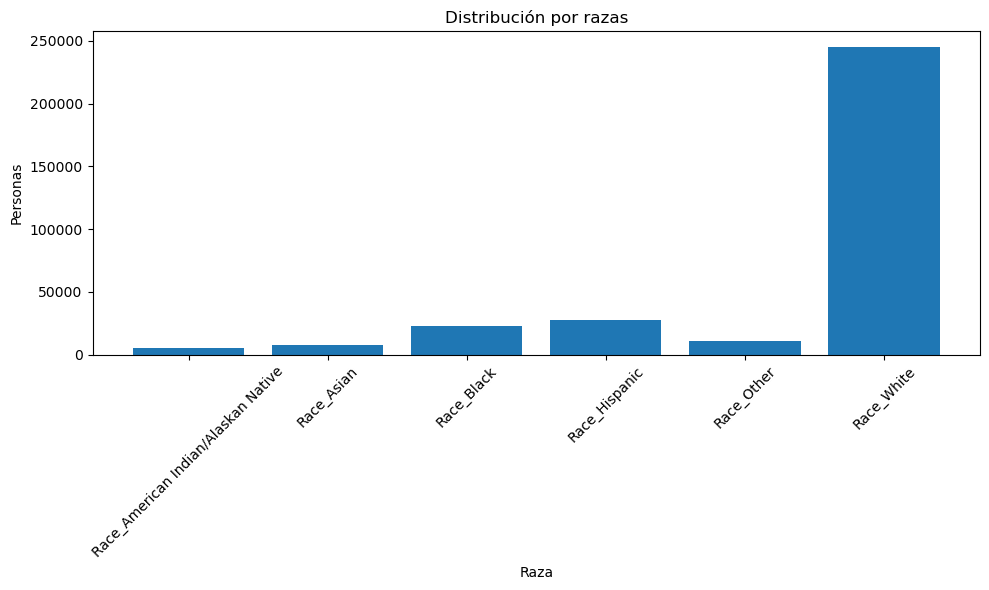

In [45]:
suma_razas = df_race.sum(axis = 0)

plt.figure(figsize = (10, 6))
plt.bar(suma_razas.index, suma_razas.values)
plt.title('Distribución por razas')
plt.xlabel('Raza')
plt.ylabel('Personas')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()


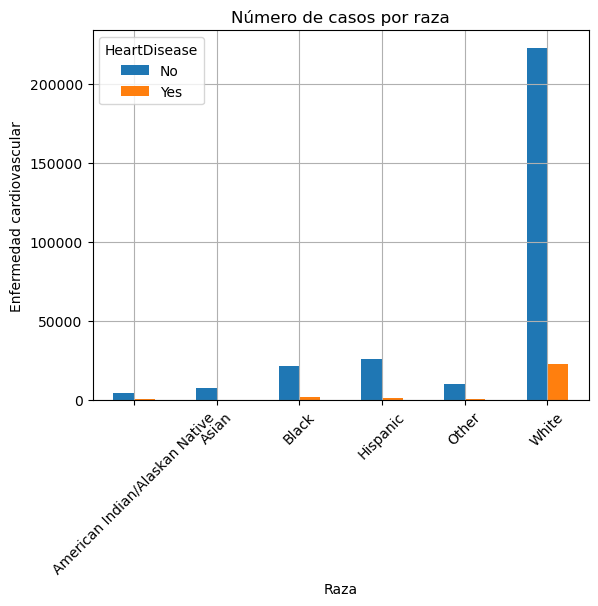

In [46]:
race_vs_hd = df.groupby(['Race', 'HeartDisease'])['HeartDisease'].count().unstack()
race_vs_hd.plot(kind = 'bar', stacked = False)
plt.xlabel('Raza')
plt.ylabel('Enfermedad cardiovascular')
plt.title('Número de casos por raza')
plt.xticks(rotation = 45)
plt.grid(True)

plt.show()

In [47]:
# Experimento con plotly.express https://plotly.com/python/bar-charts/
import plotly.express as px
race_vs_hd = df.groupby(['Race', 'HeartDisease']).size().reset_index(name='Casos')
fig = px.histogram(race_vs_hd,
                   x = 'Race',
                   y = 'Casos',
                   color = 'HeartDisease',
                   barmode = 'group',
                   height = 600,
                   width = 1024,
                   labels = {
                       'Race': 'Raza',
                       'Casos': 'Personas'
                   },
                   title = 'Enfermedad cardiovascular por raza')
fig.show()

## Columna: Diabetic

In [48]:
# Alexia

## Columna: PhysicalActivity

In [49]:
# Alexia

## Columna: GenHealth

In [50]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [51]:
df['GenHealth'].nunique()

5

In [52]:
def health_clasification(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == 'Poor':
    return 0
  elif x == 'Fair':
    return 1
  elif x == 'Good':
    return 2
  elif x == 'Very good':
    return 3
  elif x == 'Excellent':
    return 4

In [53]:
df['GenHealth'] = df['GenHealth'].apply(health_clasification)

In [54]:
df['GenHealth'].unique()

array([3, 1, 2, 0, 4])

<Axes: xlabel='HeartDisease', ylabel='GenHealth'>

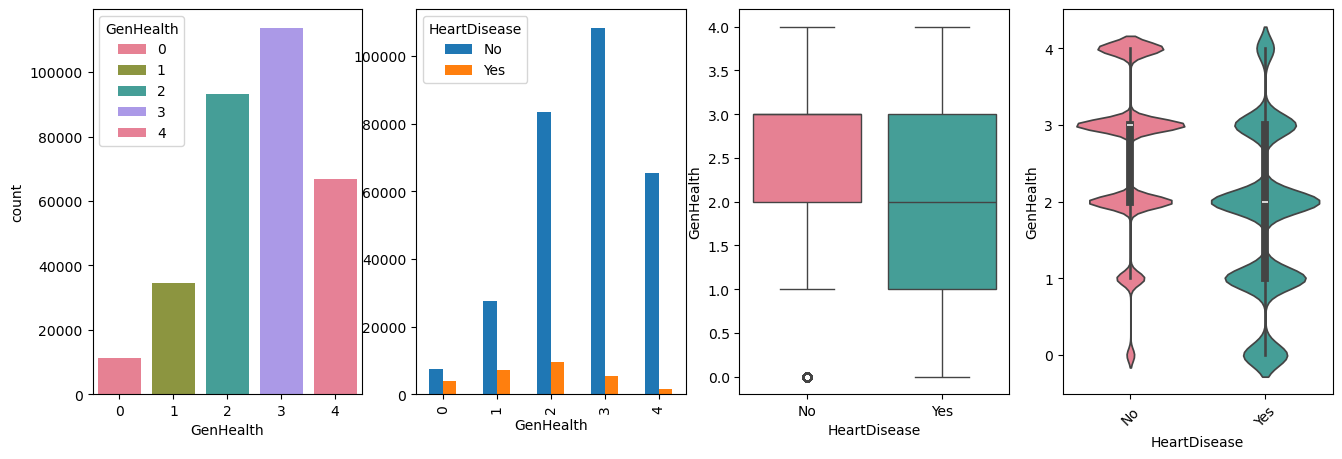

In [55]:
# Graficos 'GenHealth'

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.countplot(x='GenHealth', data=df, hue='GenHealth', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['GenHealth', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.boxplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
sns.violinplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[3])

## Columna: SleepTime

In [56]:
df['SleepTime'].unique()

array([ 5,  7,  8,  6, 12,  4,  9, 10, 15,  3,  2,  1, 16, 18, 14, 20, 11,
       13, 17, 24, 19, 21, 22, 23])

In [57]:
df['SleepTime'].nunique()

24

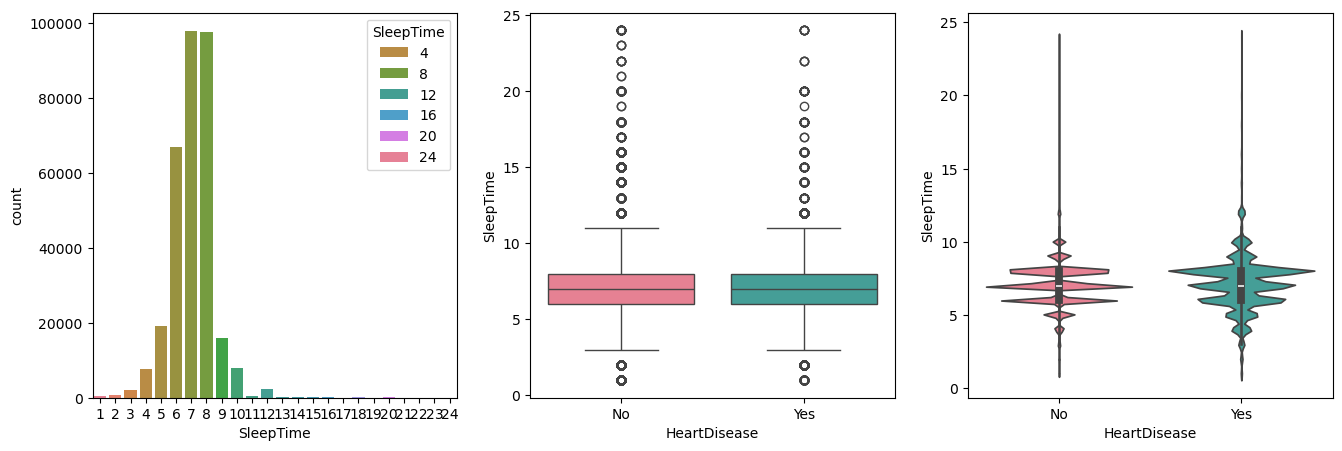

In [58]:
# Graficos 'SleepTime'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='SleepTime', data=df, hue='SleepTime', palette='husl', ax=axes[0])
sns.boxplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[1])
sns.violinplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: Asthma

In [59]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

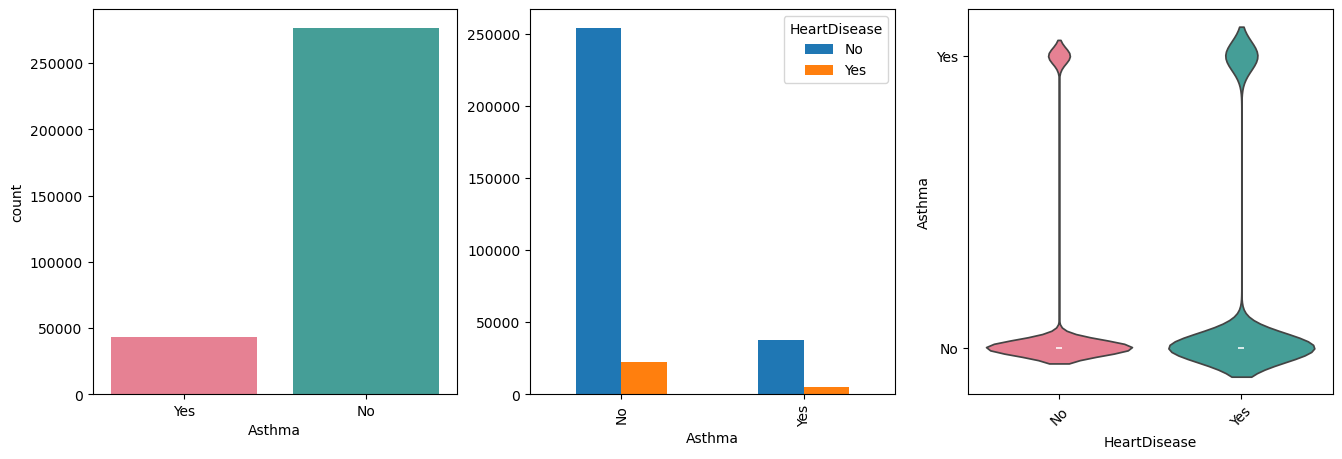

In [60]:
# Graficos 'Asthma'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='Asthma', data=df, hue='Asthma', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['Asthma', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='Asthma', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: KidneyDisease

In [61]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

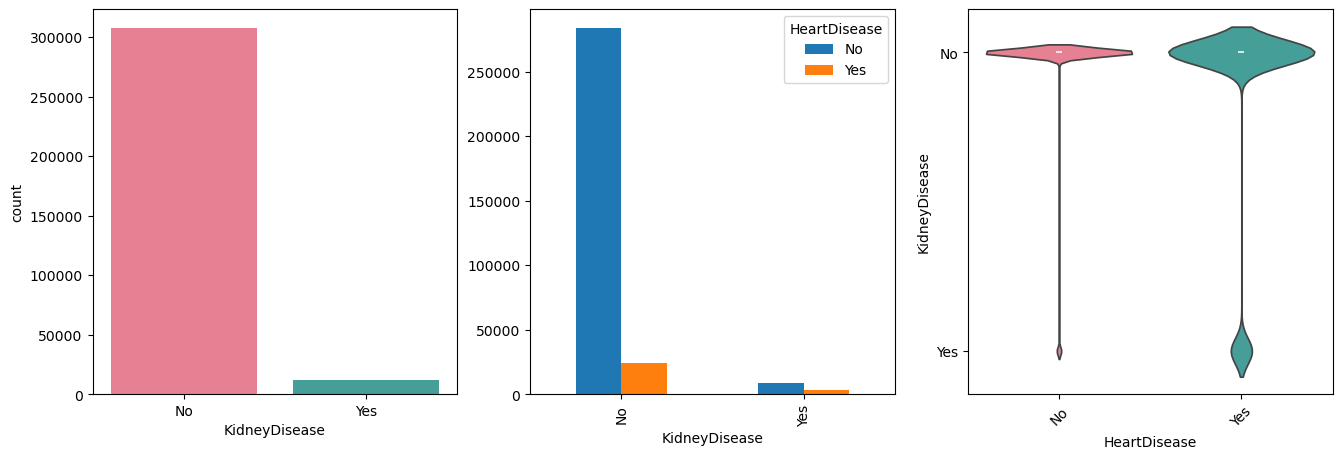

In [62]:
# Graficos 'KidneyDisease'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='KidneyDisease', data=df, hue='KidneyDisease', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['KidneyDisease', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='KidneyDisease', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: SkinCancer

In [63]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

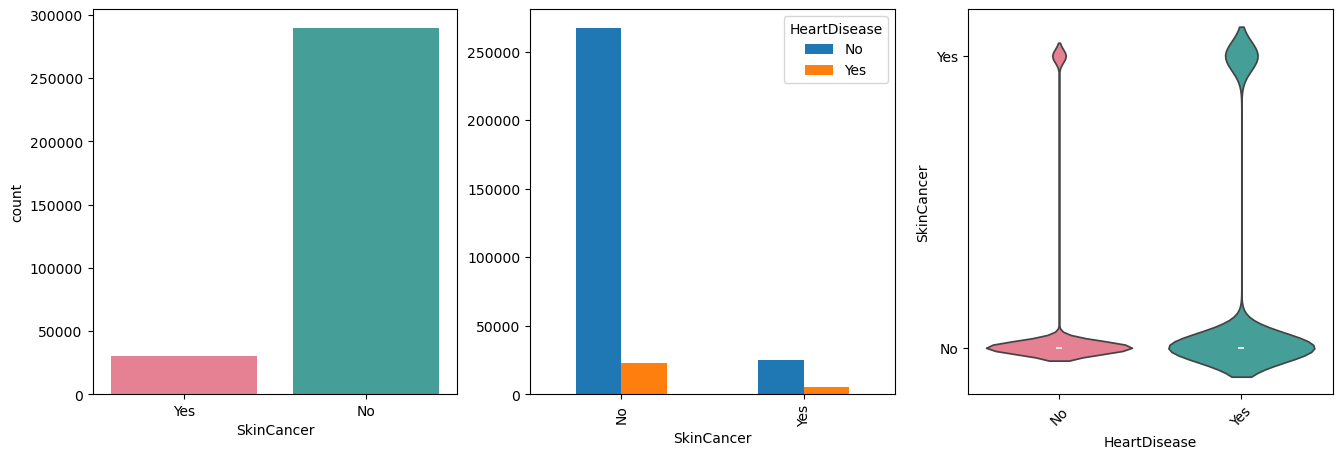

In [64]:
# Graficos 'SkinCancer'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='SkinCancer', data=df, hue='SkinCancer', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['SkinCancer', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='SkinCancer', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

# 04. Modelos, Métricas y Métodos de Validación

En esta etapa vamos a implementar los modelos de Machine Learning que se adecuen mejor al problema y como consecuencia las métricas de cada modelo.

*  Primero vamos a entrenar diferentes modelos y calcular todas las métricas y dependiendo de la naturaleza del problema vamos a seleccionar el modelo que mejor desempeño tiene, utilizando los 3 métodos de validación.

*  Luego vamos a hacerle "Tuning" con GridSearchCV para encontrar los mejores parámetros para el modelo.

En caso de estar haciendo un Algoritmo Genético o un Recomendador el objetivo de esta parte deberá ser el de mejorar el modelo para que sea más eficiente.

In [65]:
# 2024-07-01 AGM Subo la parte de ML :) <<-- todos los comentarios son eliminables luego ;)

# 2024-07-01 AGM Vemos cinco filas al azar.

df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
230392,No,26.58,No,No,No,0,3,No,Male,25-29,White,No,Yes,4,7,No,No,No
248720,No,26.58,No,No,No,7,30,Yes,Male,60-64,Black,No,No,2,8,No,No,No
166086,No,28.70,No,No,No,0,0,No,Male,60-64,White,No,Yes,3,8,No,No,No
73492,No,23.03,No,No,No,0,0,No,Female,45-49,White,No,Yes,3,7,No,No,No
281408,No,25.79,No,No,No,0,30,Yes,Female,50-54,White,No,Yes,2,9,No,No,No


In [66]:
# 2024-07-01 AGM Esta parte es para dejar el dataframe listo para ML, luego movemos esta parte. Lo que quiero para entrenar los modelos es dejar el dataframe con las columnas Yes/No a 1/0, y hacer OneHotEncoding para las que tienen varios valores.

# 2024-07-01 AGM Lo primero, hacemos una copia del dataframe.

df_ml = df.copy()
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
63083,No,21.83,No,No,No,4,30,No,Male,18-24,White,No,Yes,2,8,No,No,No
283532,No,54.93,No,No,No,10,4,No,Female,55-59,White,Yes,Yes,2,7,No,No,No
294159,No,33.47,Yes,No,No,1,15,No,Male,40-44,White,No,Yes,3,8,No,No,No
24453,No,21.90,Yes,No,No,30,0,No,Male,70-74,White,No,Yes,1,6,No,Yes,Yes
228708,No,36.26,No,No,No,0,0,No,Male,65-69,White,No,No,2,7,No,No,Yes


In [67]:
# 2024-07-01 AGM Modificamos las columnas binarias a 0´s y 1´s y la columna Sexla tratamos por separado.

columns_yes_no = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in columns_yes_no:
    df_ml[column] = df_ml[column].map({'Yes':1, 'No':0})

df_ml['Sex'] = df_ml['Sex'].map({'Male':0, 'Female':1})

df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
254560,0,31.93,1,1,0,0,0,0,0,50-54,White,No,0,3,9,0,0,0
226615,0,32.10,1,0,0,0,15,0,0,50-54,White,No,1,2,5,0,0,0
186714,0,22.31,0,0,0,3,0,0,1,25-29,White,No,1,3,6,1,0,0
262486,0,26.54,1,0,0,1,0,0,0,60-64,White,No,1,2,8,0,0,0
314142,0,29.29,0,0,0,0,30,0,1,65-69,White,No,1,3,7,0,0,0


In [68]:
# 2024-07-01 AGM Modificamos ahora las columnas categóricas haciendo OneHotEncoding.

columns_to_encode = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

# 2024-07-01 AGM Inicializar el OneHotEncoder. Sparse_output = false genera una matriz que se puede convertir a dataframe.
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)

# 2024-07-01 AGM Crea tabla con todas las columnas que se han codificado.
encoded_data = one_hot_encoder.fit_transform(df_ml[columns_to_encode])

# 2024-07-01 AGM Convertimos dataframe del encoded_data y asignamos nombres a las columnas.
df_encoded_data = pd.DataFrame(encoded_data, columns = one_hot_encoder.get_feature_names_out(columns_to_encode))
df_encoded_data

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319792,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
# 2024-07-01 AGM Eliminamos las columnas codificadas.

df_ml.drop(columns = columns_to_encode, inplace = True)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [70]:
# 2024-07-01 AGM Vamos a unir ambos dataframes. Importante: Al usar concat hay que especificar si queremos que concatene los dataframes verticalmente u horizontalmente. Para concatenar horizontalmente hay que usar axis = 1, para verticalmente, axis = 0. Lo descubrí tras varios fallos y ChatGPT me ayudó :P

df_ml = pd.concat([df_ml, df_encoded_data], axis = 1)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_0', 'GenHealth_1',
       'GenHealth_2', 'GenHealth_3', 'GenHealth_4'],
      dtype='object')

In [71]:
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
244637,0,32.92,0,0,0,30,0,1,1,1,8,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
215557,0,23.29,1,0,0,0,0,0,0,1,6,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
168634,1,35.44,1,0,0,0,10,0,0,0,12,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
222692,0,29.18,1,0,0,0,0,0,1,1,6,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166500,0,18.83,1,0,0,0,0,0,1,1,7,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
df_ml.isna().sum()

HeartDisease                           0
BMI                                    0
Smoking                                0
AlcoholDrinking                        0
Stroke                                 0
PhysicalHealth                         0
MentalHealth                           0
DiffWalking                            0
Sex                                    0
PhysicalActivity                       0
SleepTime                              0
Asthma                                 0
KidneyDisease                          0
SkinCancer                             0
AgeCategory_18-24                      0
AgeCategory_25-29                      0
AgeCategory_30-34                      0
AgeCategory_35-39                      0
AgeCategory_40-44                      0
AgeCategory_45-49                      0
AgeCategory_50-54                      0
AgeCategory_55-59                      0
AgeCategory_60-64                      0
AgeCategory_65-69                      0
AgeCategory_70-7

In [76]:
# 2024-07-01 AGM De alguna manera se nos ha colado algún nulo. Me los cargo para poder hacer rápido esto, pero habrá que echar un vistazo.

df_ml.dropna(inplace = True)

In [78]:
# 2024-07-01 AGM Convertimos de Float a int todas las columnas excepto BMI.

for column in df_ml.columns:
    if column != 'BMI':
        df_ml[column] = df_ml[column].astype(int)

df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
129505,0,25.09,0,0,0,0,0,0,0,1,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
303556,0,32.78,1,0,0,0,0,1,0,1,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
212415,1,26.00,1,0,0,0,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
89120,0,24.89,0,0,0,0,7,0,1,1,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
47747,0,28.34,1,0,1,1,15,0,1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
# 2024-07-01 AGM Variable a predecir (Target): HeartDisease

df_ml_copy = df_ml.copy()

X = df_ml_copy.drop('HeartDisease', axis = 1)
y = df_ml_copy['HeartDisease']

In [ ]:
# 2024-07-01 AGM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# 2024-07-01 AGM Usamos de normalizador el MinMaxScaler. Se puede probar con varios.

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# # 2024-07-01 AGM Modelos candidatos: añadir mas opciones luego.

# candidate_models = {'Regresión logística', LogisticRegression(max_iter = 1000),
#                     'Árbol de decisión', DecisionTreeClassifier(),
#                     'Random forest', RandomForestClassifier(),
#                     'Gradient boosting', GradientBoostingClassifier(),
#                     'Adaboost', AdaBoostClassifier(),
#                     'KNN', KNeighborsClassifier(),
#                     'Gaussian NB', GaussianNB(),
#                     'LDA', LinearDiscriminantAnalysis(),
#                     'QDA', QuadraticDiscriminantAnalysis()}

# # Quito 'SVM': SVC() del diccionario porque tarda mucho (222 minutos).
# for name, model in candidate_models.items():
#     model.fit(X_train, y_train)
#     y_predict = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_predict)
#     print(f'{name}: \naccuracy: {accuracy}')
#     print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob)}\n")
#     print(confusion_matrix(y_test, y_predict))

Regresión logística: 
accuracy: 0.9138666958520302
[[57890   477]
 [ 5032   560]]
Árbol de decisión: 
accuracy: 0.8634906737128473
[[53816  4551]
 [ 4180  1412]]
Random forest: 
accuracy: 0.9026876592817273
[[57064  1303]
 [ 4921   671]]
Gradient boosting: 
accuracy: 0.9140230460138526
[[57963   404]
 [ 5095   497]]
Adaboost: 
accuracy: 0.9136321706092966
[[57801   566]
 [ 4958   634]]
KNN: 
accuracy: 0.9054237871136197
[[57191  1176]
 [ 4873   719]]
Gaussian NB: 
accuracy: 0.7119248268421958
[[41158 17209]
 [ 1216  4376]]
LDA: 
accuracy: 0.9055957722916244
[[56561  1806]
 [ 4232  1360]]
QDA: 
accuracy: 0.66550446379712
[[38086 20281]
 [ 1113  4479]]


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
# Función para entrenar y evaluar un modelo
def func_train_and_evaluate_model(modelo, nombre_modelo):
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else modelo.decision_function(X_test)

    print(f'Resultados para {nombre_modelo}:\n')
    print(confusion_matrix(y_test, y_predict))
    print(classification_report(y_test, y_predict))
    print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}\n')
    print('-' * 60)

modelos = [(LogisticRegression(max_iter = 1000), 'Regresión logística'),
           (DecisionTreeClassifier(), 'Árbol de decisión'),
           (RandomForestClassifier(), 'Random forest'),
           (GradientBoostingClassifier(), 'Gradient boosting'),
           (AdaBoostClassifier(), 'Adaboost'),
           (KNeighborsClassifier(), 'KNN'),
           (GaussianNB(), 'Gaussian NB'),
           (LinearDiscriminantAnalysis(), 'LDA'),
           (QuadraticDiscriminantAnalysis(), 'QDA')]

In [ ]:
# Entrenamiento y evaluación de los modelos
for modelo, nombre in modelos:
    func_train_and_evaluate_model(modelo, nombre)

  # Crear dataframe con los datos

Resultados para Regresión logística:

[[57890   477]
 [ 5032   560]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.54      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959

ROC AUC Score: 0.8364465074638836

------------------------------------------------------------
Resultados para Árbol de decisión:

[[53830  4537]
 [ 4183  1409]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58367
           1       0.24      0.25      0.24      5592

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.58     63959
weighted avg       0.87      0.86      0.87     63959

ROC AUC Score: 0.588062092514454

------------------------------------------------------------
Resultados para Ran

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Resultados para QDA:

[[38086 20281]
 [ 1113  4479]]
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     58367
           1       0.18      0.80      0.30      5592

    accuracy                           0.67     63959
   macro avg       0.58      0.73      0.54     63959
weighted avg       0.90      0.67      0.74     63959

ROC AUC Score: 0.7981658479607587

------------------------------------------------------------


### Conclusiones

El modelo de **Gradient Boosting** y **Regresión Logística** han mostrado el mejor rendimiento global en términos de precisión, recall y ROC AUC Score. Ambos tienen una precisión en clase 0 (no enfermo) muy alta, pero una precisión y recall más bajos en la clase 1 (enfermo).

# Evalución con RandomForest y GradientBoosting

In [ ]:
# TARDA  MINUTOS

# Validación Cruzada y Ajuste de Hiperparámetros para Random Forest

# Definir el conjunto de hiperparámetros para Random Forest
param_grid_random_forest = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_random_forest = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid_random_forest, cv = 5, n_jobs = -1, scoring = 'roc_auc')

grid_search_random_forest.fit(X_train, y_train)

print(f'Mejores parámetros para Random Forest: {grid_search_random_forest.best_params_}')

# Evaluación
best_random_forest = grid_search_random_forest.best_estimator_
func_train_and_evaluate_model(best_random_forest, 'Random Forest con ajuste de hiperparámetros')

KeyboardInterrupt: 

In [ ]:
# TARDA  MINUTOS

# Validación Cruzada y Ajuste de Hiperparámetros para Gradient Boosting

# Definir el conjunto de hiperparámetros para Gradient Boosting
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200, 250],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_gradient_boosting = GridSearchCV(GradientBoostingClassifier(random_state = 42), param_grid_gradient_boosting, cv = 5, n_jobs = -1, scoring = 'roc_auc')

grid_search_gradient_boosting.fit(X_train, y_train)

print(f'Mejores parámetros para Gradient Boosting: {grid_search_gradient_boosting.best_params_}')

# Evaluación
best_gradient_boosting = grid_search_gradient_boosting.best_estimator_
func_train_and_evaluate_model(best_gradient_boosting, 'Gradient Boosting con ajuste de hiperparámetros')

Gradient Boosting parece ofrecer un mejor rendimiento general en términos de precisión, recall y F1-score para la clase positiva (casos de enfermedad cardíaca) en comparación con Random Forest


# Ajuste del Umbral de Decisión

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state = 42)

# Parámetros ajustados
param_grid = {
    'n_estimators': [50, 100, 200, 250],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = gradient_boosting, param_grid = param_grid, scoring = 'roc_auc', cv = 5, verbose = 1, n_jobs = -1)

grid_search.fit(X, y)

# Mejores parámetros y score
print('Mejores parámetros encontrados:')
print(grid_search.best_params_)
print()
print(f'Mejor ROC AUC score encontrado: {grid_search.best_score_:.4f}')

Después de realizar el ajuste de hiperparámetros utilizando Grid Search Cross-Validation, encontramos que el mejor modelo Gradient Boosting Classifier tiene los siguientes parámetros optimizados:

- Mejores parámetros encontrados: {}
- Mejor ROC AUC score encontrado:

In [ ]:
# calcular las métricas con los mejores parámetros

# 05. Resultados y Conclusiones

Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

Rendimiento del Modelo: El modelo Gradient Boosting Classifier optimizado muestra una capacidad significativa para predecir la variable objetivo (Heart Disease) con un ROC AUC promedio de '' en validación cruzada y '' en el conjunto de prueba independiente.

# 06. Storytelling

Como último vamos a hacer una pequeña presentación de principio a fin sobre el proyecto, esta presentación puede incluir:

*  Motivaciones del proyecto.

*  Alcance del proyecto.

*  Herramientas o tecnologías usadas.

*  Desafíos en cada parte del proceso.

*  Resolución de cada desafío o problema.

*  Un esquema de lo que fue el proyecto.

*  Visualizaciones y resultados.

Todos los miembros del equipo deben participar, no es obligatorio hacer una presentación o material audiovisual. Esta parte no será evaluada.